In [14]:
import json
from typing import List
import numpy as np
import matplotlib.pyplot as plt

In [23]:
class Fish:
    def __init__(self):
        self.x:  List[float] = []
        self.y:  List[float] = []
        self.vx: List[float] = []
        self.vy: List[float] = []
            
class Fishes:
    def __init__(self, fish: List[Fish], time: List[float]):
        self.fishes: List[Fish] = fish
        self.time: List[float] = time

def deserialize(lines: List[str]):
    time: List[float] = []
    fishes: List[Fish] = []
    
    if len(lines) % 5 != 0:
        raise Exception("Wrong format")

    for k in range(0, len(lines), 5):
        # Append timestamp value
        time_str = lines[k][len("t = "):-1]
        time.append(float(time_str))

        decoder = json.JSONDecoder()

        # Deserialize coordinates
        x_str = lines[k+1]
        y_str = lines[k+2]
        vx_str = lines[k+3]
        vy_str = lines[k+4]
        x = decoder.decode(x_str)
        y = decoder.decode(y_str)
        vx = decoder.decode(vx_str)
        vy = decoder.decode(vy_str)

        # Append fish
        if len(fishes) == 0:
            fishes = [Fish() for _ in x]

        if len(x) != len(fishes) or len(y) != len(fishes) or len(vx) != len(fishes) or len(vy) != len(fishes):
            raise Exception(f"Wrong format: [{len(x)}, {len(y)}, {len(vx)}, {len(vy)}] != {len(fishes)}")

        for index, fish in enumerate(fishes):
            fish.x.append(x[index])
            fish.y.append(y[index])
            fish.vx.append(vx[index])
            fish.vy.append(vy[index])
            
    return Fishes(fishes, time)

In [24]:
data_file = "boids_out.txt"
with open(data_file) as file:
    lines = [line.strip() for line in file.readlines()]

fishes: Fishes = deserialize(lines)

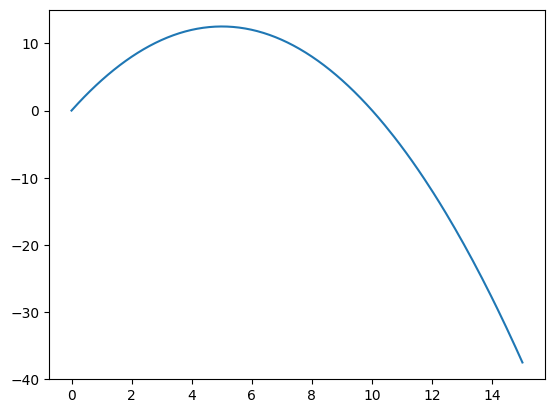

In [29]:
# y(t)
current = fishes.fishes[3]
plt.plot(fishes.time, current.y)

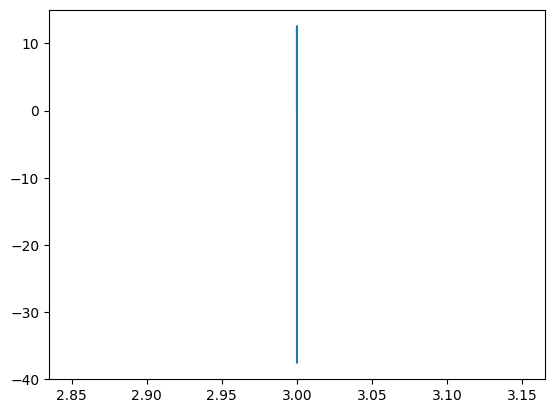

In [30]:
# y(x) - path
current = fishes.fishes[3]
plt.plot(current.x, current.y)